In [16]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

The Calogero-Moser Derivative Nonlinear Schrodinger equation is
$$iu_t + u_xx + 2 D_+ (|u|^2)u = 0.$$
After making the gauge transformation
$$v(x) := u(x)e^{-\frac{i}{2} \int_{-\infty}^x |u(y)|^2 dy},$$
we arrive at the equivalent equation
$$i v_t + v_{xx} + |D| (|v|^2) v - \frac{1}{4} |v|^4 v = 0.$$
Letting $A$ and $B$ be operators such that $Av = iv_{xx}$ and $Bv = i(|D|(|v|^2) - \frac{1}{4}|v|^4)v$, then we have
$$v_t = (A + B)v,$$
so that
$$v(t) = e^{t(A+B)}v_0.$$
To compute $e^{tA}$, we need to solve the linear Schrodinger equation
$$v_t = iv_{xx},$$
which

In [2]:
def linear_propagator(v, dt):
    """Return e^{dt A} v"""
    v_hat = np.fft.fft(v)
    v_hat *= np.exp(-1j * dt * xi**2)
    v_new = np.fft.ifft(v_hat)
    return v_new

def nonlinear_propagator(v, dt):
    """Return e^{dt B} v.  TODO: implement this"""
    return v

def split_step(v, dt):
    """Do one timestep using split step method"""
    v_new = linear_propagator(v, dt/2)
    v_new = nonlinear_propagator(v, dt)
    v_new = linear_propagator(v, dt/2)
    return v_new

def evolve(v_0):
    v = np.empty(shape=(N_t, N_x), dtype=complex)
    v[0] = v_0
    for i in tqdm(range(N_t - 1)):
        v[i+1] = split_step(v[i], dt)
    return v

In [3]:
x_0 = -100
x_1 = 100
dx = 0.001

t_0 = 0
t_1 = 1
dt = 0.001

x = np.arange(x_0, x_1, dx)
t = np.arange(t_0, t_1, dt)

N_x = len(x)
N_t = len(t)

xi = np.fft.fftfreq(N_x) * 2 * np.pi / dx

v_0 = 1j*np.abs(1/(x + 1j))

In [4]:
v = evolve(v_0)

  0%|          | 0/999 [00:00<?, ?it/s]

In [21]:
def animate(f, t, x):
    fig, ax = plt.subplots()
    
    ax.set_xlim(x_0, x_1)
    ax.set_ylim(0, np.max(np.abs(f)))
    
    line, = ax.plot(x, np.abs(f[0]))

    def update(frame):
        line.set_ydata(f[frame])
        return line,
    
    animation = FuncAnimation(fig, update, frames=len(t), interval=50, blit=True)
    
    plt.show()
    
    return animation

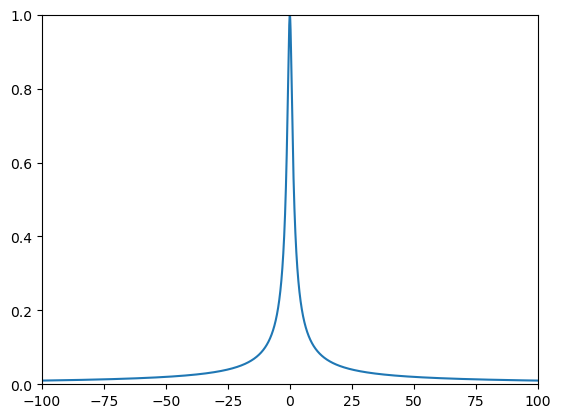

In [17]:
animation = animate(np.abs(v[::10,:]), t[::10], x)

In [20]:
HTML(animation.to_jshtml())